In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Box-Cox Transformations
from scipy import stats

# for min_max scaling
import seaborn as sns
import missingno

# Load the Dataset
df = pd.read_csv("Titanic.csv")

# Display the first few ros
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Display the last few rows 
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
# Return the number of missing values in the dataset
missing_values_count = df.isnull().sum()

# Look at the # of missing points in the first ten columns
missing_values_count[0:8]

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
dtype: int64

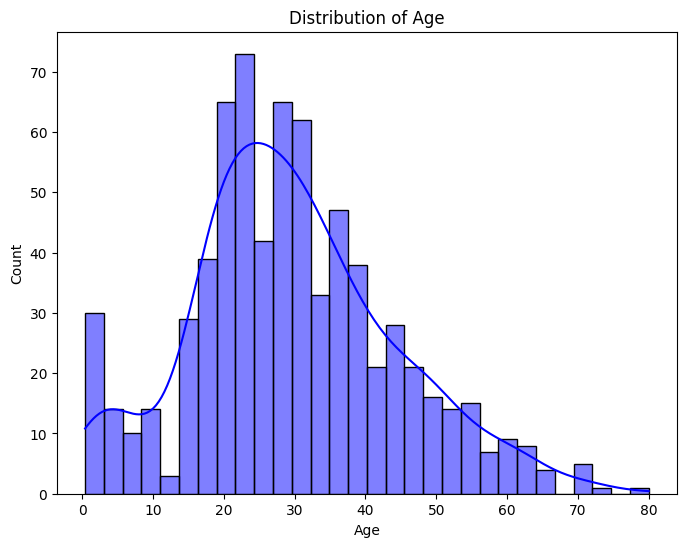

In [5]:
# Visualise the distribution of age
plt.figure(figsize=(8,6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

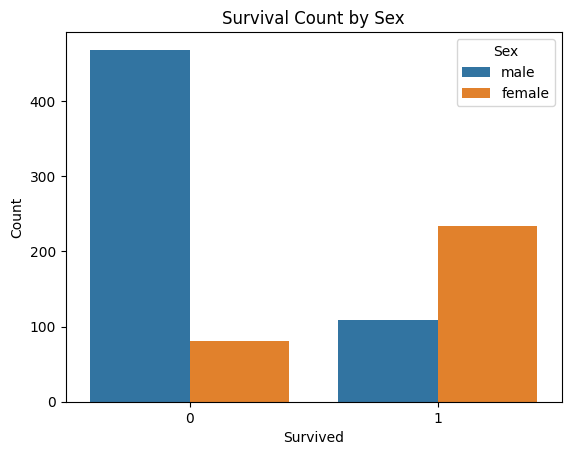

In [6]:
# Survival Rate by Sex
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

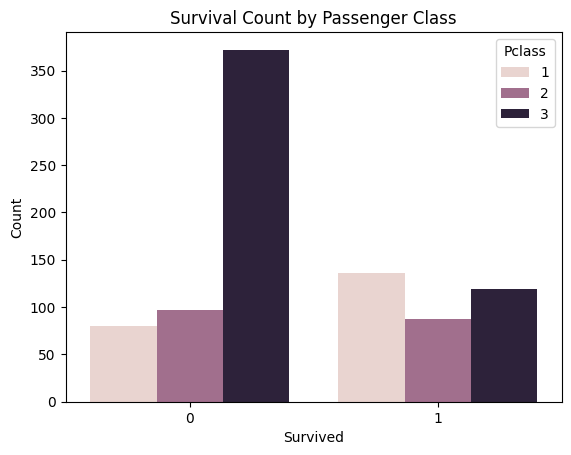

In [7]:
# Survival Rate by Passenger class
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

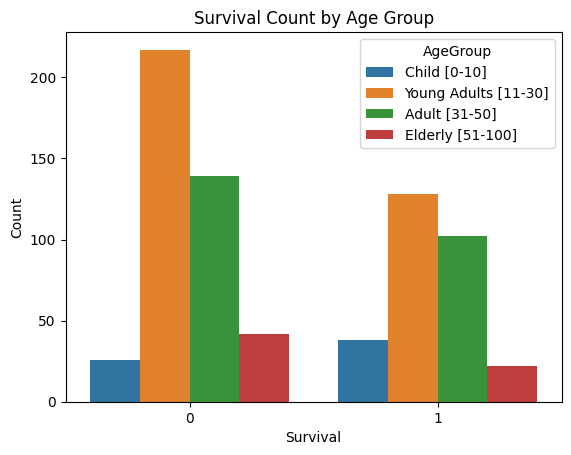

In [8]:
# Survival Rate by Age group
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 30, 50, 100], labels=['Child [0-10]', 'Young Adults [11-30]', 'Adult [31-50]', 'Elderly [51-100]'])
sns.countplot(x='Survived', hue='AgeGroup', data=df)
plt.title('Survival Count by Age Group')
plt.xlabel('Survival')
plt.ylabel('Count')
plt.show()

C:\Users\fyusu\AppData\Local\Temp\ipykernel_21684\3550836330.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')


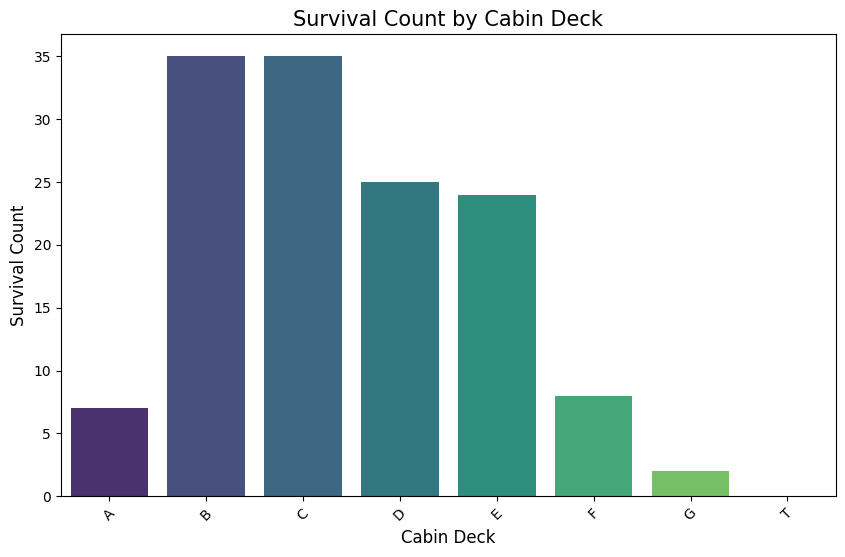

In [11]:
# Extract the cabin deck (first letter of the Cabin column)
df['Cabin_deck'] = df['Cabin'].str.slice(0,1)

# Group the data by cabin deck and calculate survival counts
survival_counts = df.groupby('Cabin_deck')['Survived'].sum()

# Plot the survival counts
plt.figure(figsize=(10, 6))
sns.barplot(x=survival_counts.index, y=survival_counts.values, palette='viridis')
plt.title('Survival Count by Cabin Deck', fontsize=15)
plt.xlabel('Cabin Deck', fontsize=12)
plt.ylabel('Survival Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

Question 1 - What is the most important factor in determining the survival of the Titanic incident?

Answer 1 - There are many different factors but the most important is the passenger class. Passengers from first class would have had better access to lifeboats and were given priority. This is reflected in the count plot data as more first-class passengers survived the incident than the lower classes. 

Question 2 - In the movie, the upper-class passengers were given preference for lifeboats. Does this show in the data?

Answer 2 - Yes, this is shown in the count plot data above, under the title 'Survival Rate by Passenger Class'. In the 'survived' column there were more passengers that survived from first class (1) than the other classes.

Question 3 - 'Women and Children First', was this the case?

Answer 3 - From the 'Survival Count by Sex' count plot, there were more female passengers who survived the Titanic incident than males. As for the children, from looking at the 'Survival Count by Age Group', comparing both columns we can see that more children survived than died. In all the other age groups, more people died than survived but for the children, more survived the incident. 

Question 4 - Add one other observation that you have noticed in the dataset.

Answer 4 - From  the 'Survival Count by Cabin Deck' data, as you go deeper into the Titanic, fewer passengers survived as they were nearer to the bottom of the boat. The outlier in this graph is deck A as this has one of the lowest survival count. 